### We look at the state transitions during the testing

In [1]:
from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
start = Time('2020-03-02T00:00:00') #this is UTC
end = Time('2020-03-06T23:59:00') 

In [3]:
client = EfdClient('summit_efd')
csc_index = 1

In [4]:
#known bug, M2 sends utc everywhere.
df = await client.select_time_series('lsst.sal.MTM2.logevent_summaryState', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)
df.head()

,priority,private_host,private_kafkaStamp,private_origin,private_rcvStamp,private_revCode,private_seqNum,private_sndStamp,summaryState
2020-03-02 12:40:36.733059822+00:00,0,1,1.583153e+09,144799,1.583153e+09,d3ffb0cb,0,1.583153e+09,5
2020-03-02 12:40:36.733063439+00:00,0,1,1.583153e+09,144799,1.583153e+09,d3ffb0cb,1,1.583153e+09,1
2020-03-02 12:40:36.733066464+00:00,0,1,1.583153e+09,144799,1.583153e+09,d3ffb0cb,2,1.583153e+09,5
2020-03-02 12:40:36.733069286+00:00,0,1,1.583153e+09,144799,1.583153e+09,d3ffb0cb,3,1.583153e+09,4
2020-03-02 12:41:55.578619918+00:00,0,1,1.583153e+09,144799,1.583153e+09,d3ffb0cb,4,1.583153e+09,4


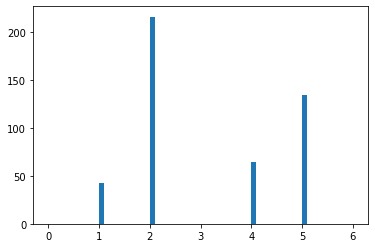

In [8]:
mybin = np.linspace(0, 6, 61)
plt.hist(df.summaryState, mybin);

* diagnostic = 1, 
* enable =2, 
* standby=5
* ?? = 4